# Feed-Forward Neural Network & LSTM

- ep:4, bs: 512, LSTM(100), 0.853 on test set, 0.854 on validation set, 0.8591 on training set glove(100)
- ep:4, bs: 512, LSTM(100), 0.856 on test set, 0.8606 on validation set, 0.8667 on training set glove(200)

In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from create_submission import create_csv_submission
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import LSTM

import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
X_train_pos = np.load('positive_tweets.npy')
X_train_neg = np.load('negative_tweets.npy')

from Dataset import DataSet
from GloveModel import GloveModel
dataset = DataSet(GloveModel('glove_twitter_100', 100))

dataset.create_train_test(X_train_pos, X_train_neg, True)

10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 lines processed
440000 lines process

In [9]:
dataset.create_train_test(np.load('test_tweets.npy'), "", False)

10000 lines processed
Set completed.
X_test shape: (10000, 100)


In [5]:
train_data, test_data, embedding_layer = dataset.create_embedding(embedding_dim=100,seq_length=40)

Null word embeddings: 1017966


In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding

embedding_dim=100
seq_length=40
tokenizer = Tokenizer(num_words=len(dataset.vec_type.get_model().vocab))
tokenizer.fit_on_texts(dataset.X_train_cnn)

sequences = tokenizer.texts_to_sequences(dataset.X_train_cnn)
train_data = pad_sequences(sequences, maxlen=seq_length)

sequences_test = tokenizer.texts_to_sequences(dataset.X_test_cnn)  # test
test_data = pad_sequences(sequences_test, maxlen=seq_length)

word_index = tokenizer.word_index


In [19]:
nb_words = min(len(dataset.vec_type.get_model().vocab), len(word_index)) +1

embedding_matrix = np.zeros((nb_words, embedding_dim))

for word, i in word_index.items():
    if word in dataset.vec_type.get_model().vocab:
        embedding_matrix[i] = dataset.vec_type.get_model()[word]
    else:
        print(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

embedding_layer = Embedding(embedding_matrix.shape[0],  # or len(word_index) + 1
                            embedding_matrix.shape[1],  # or EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=seq_length,
                            trainable=False)

Null word embeddings: 1


In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, dataset.y_train, test_size=0.2, random_state=23)

In [27]:
X_train.shape

(1999097, 40)

In [30]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
1999097/1999097 [==============================] - 1358s 679us/step - loss: 0.3390 - acc: 0.8468
Epoch 2/3
1999097/1999097 [==============================] - 1374s 687us/step - loss: 0.3252 - acc: 0.8544
Epoch 3/3
1999097/1999097 [==============================] - 1324s 662us/step - loss: 0.3165 - acc: 0.8591


In [17]:
model.fit(X_train, y_train, epochs=1, batch_size=512)

Epoch 1/3
1999097/1999097 [==============================] - 1308s 655us/step - loss: 0.3786 - acc: 0.8240
Epoch 2/3
1999097/1999097 [==============================] - 1247s 624us/step - loss: 0.3408 - acc: 0.8459
Epoch 3/3
1999097/1999097 [==============================] - 1269s 635us/step - loss: 0.3261 - acc: 0.8539


In [ ]:
model.to_json()

In [42]:
model.evaluate(X_valid, y_valid)

499775/499775 [==============================] - 162s 325us/step


[0.3248797593299948, 0.8543104396963136]

In [43]:
prediction = model.predict_classes(test_data)

In [44]:
prediction.shape

(10000, 1)

In [45]:
sum(prediction)

array([5266], dtype=int32)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

***

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [67]:
print(X_train.shape)
print(X_valid.shape)

(1999097, 100)
(499775, 100)


In [68]:
np.random.seed(23)

model = Sequential()
model.add(Dense(256, input_dim=100, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.fit(X_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
1999097/1999097 [==============================] - 33s 17us/step - loss: 0.4201 - acc: 0.7973
Epoch 2/10
1999097/1999097 [==============================] - 30s 15us/step - loss: 0.3972 - acc: 0.8117
Epoch 3/10
1999097/1999097 [==============================] - 29s 15us/step - loss: 0.3886 - acc: 0.8166
Epoch 4/10
1999097/1999097 [==============================] - 31s 15us/step - loss: 0.3825 - acc: 0.8202
Epoch 5/10
1999097/1999097 [==============================] - 33s 16us/step - loss: 0.3780 - acc: 0.8227
Epoch 6/10
1999097/1999097 [==============================] - 33s 16us/step - loss: 0.3740 - acc: 0.8250
Epoch 7/10
1999097/1999097 [==============================] - 31s 16us/step - loss: 0.3708 - acc: 0.8268
Epoch 8/10
1999097/1999097 [==============================] - 31s 16us/step - loss: 0.3680 - acc: 0.8283
Epoch 9/10
1999097/1999097 [==============================] - 32s 16us/step - loss: 0.3653 - acc: 0.8297
Epoch 10/10
1999097/1999097 [==========================

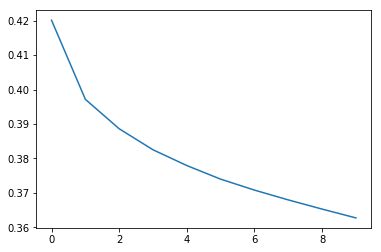

In [71]:
plt.plot(model.history.epoch, model.history.history['loss'])

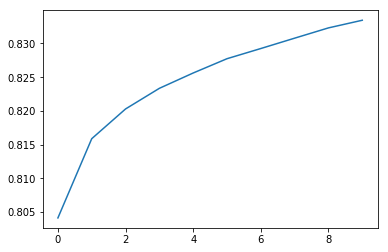

In [31]:
plt.plot(model.history.epoch, model.history.history['acc'])

In [32]:
model.evaluate(X_valid, y_valid)

499775/499775 [==============================] - 26s 52us/step


[0.3699295557050336, 0.8270041518686986]

***

In [72]:
positive_tweets = np.load('positive_tweets.npy')
negative_tweets = np.load('negative_tweets.npy')
test_tweets = np.load('test_tweets.npy')

In [77]:
X_train_tweets = np.append(positive_tweets, negative_tweets, axis=0)

In [78]:
X_train_tweets.shape

(2500000,)

# Word2Vec size = 100

In [2]:
from Word2VecModel import Word2VecModel

In [31]:
model_100 = Word2VecModel(128,5)
model_100.load_dataset('dataset.pkl')

In [32]:
model_100.train()

Training starts
Training ends
Word2Vec Model saved


In [34]:
from Dataset import DataSet
dataset = DataSet(model_100)

In [35]:
deleted_substr = ['#', '<user>', '<url>']

dataset.create_train_test('../data/train_pos_full.txt', '../data/train_neg_full.txt', 
                          delete_substr=deleted_substr, 
                          training=True)

Total lines (label = 1): 1250000
10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 lin

In [83]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print(X_train.shape)

(2499130, 128)


In [84]:
scaler = MinMaxScaler(feature_range=(-1,1))
X_train = scaler.fit_transform(X_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_valid.shape)

(1999304, 128)
(499826, 128)


# 128-64-ep:10-bs:128, W2V=100, 0.822 on test set, 0.827 on valid set

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
np.random.seed(23)

model = Sequential()
model.add(Dense(128, input_dim=128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=128)

Epoch 1/15
1999304/1999304 [==============================] - 49s 24us/step - loss: 0.3973 - acc: 0.8102
Epoch 2/15
1999304/1999304 [==============================] - 51s 25us/step - loss: 0.3738 - acc: 0.8241
Epoch 3/15
1999304/1999304 [==============================] - 48s 24us/step - loss: 0.3666 - acc: 0.8280
Epoch 4/15
1999304/1999304 [==============================] - 48s 24us/step - loss: 0.3623 - acc: 0.8305
Epoch 5/15
1999304/1999304 [==============================] - 50s 25us/step - loss: 0.3593 - acc: 0.8321
Epoch 6/15
1999304/1999304 [==============================] - 65s 33us/step - loss: 0.3568 - acc: 0.8334
Epoch 7/15
1999304/1999304 [==============================] - 50s 25us/step - loss: 0.3549 - acc: 0.8344
Epoch 8/15
1999304/1999304 [==============================] - 47s 23us/step - loss: 0.3532 - acc: 0.8354
Epoch 9/15
1999304/1999304 [==============================] - 51s 25us/step - loss: 0.3519 - acc: 0.8363
Epoch 10/15
1999304/1999304 [==========================

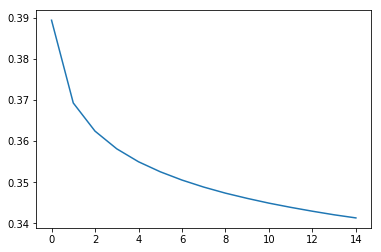

In [77]:
plt.plot(model.history.epoch, model.history.history['loss'])

In [78]:
model.evaluate(X_valid, y_valid)

499826/499826 [==============================] - 23s 46us/step


[0.3550404482837187, 0.8346444562700668]

In [68]:
dataset.create_train_test('../data/test_data.txt', '', delete_substr=deleted_substr, training=False)

Total lines (label = 1): 10000


AttributeError: 'numpy.ndarray' object has no attribute 'append'

***

***

In [69]:
X_test = np.load('X_test.npy')
X_test = scaler.transform(X_test)

In [70]:
X_test.shape

(10000, 128)

In [71]:
pred = model.predict_classes(X_test)

In [46]:
prediction[prediction == 0] = -1

In [47]:
prediction = prediction.flatten()

In [48]:
create_csv_submission(range(1,10001), prediction, 'output.csv')